# Gathering data:

I have already downloaded manually data from 2019 from 
Ford GoBike System Data 

So the first thing that I want to do is to merge all the data into one DataFrame to work properly, and add a new column, which is related to the date.

In [1]:
#We obtain all the files and save them in l
l = !ls
l

['201901-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 'Proyect.ipynb']

In [2]:
#We read a csv in order to see how the columns are distributed
import pandas as pd

df_aux = pd.read_csv(l[1])
df_aux.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Now we get the columns in a variable
col = list(df_aux.columns.values)
col

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [4]:
#Here I go through all the files and merge them into one dataframe
s = '.csv'

df = pd.DataFrame(columns = col)
for f in l:
    if (s in f):
        df_aux = pd.read_csv(f)
        df = pd.concat([df,df_aux])
        
        
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


# Data Assessing:

In this section I am going to start looking for possible errors.


## Quality Problems:



In [5]:
#Make a copy in order to maintain original data
df_ = df

In [6]:
df_.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


At first glance, the data looks ok, but let's inspect a little bit more

In [7]:
df_.dtypes

duration_sec                object
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

We see already that there are a bunch of problems in the data types, which are going to be reported down below.

In [8]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870904 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               870904 non-null object
start_time                 870904 non-null object
end_time                   870904 non-null object
start_station_id           870174 non-null float64
start_station_name         870174 non-null object
start_station_latitude     870904 non-null float64
start_station_longitude    870904 non-null float64
end_station_id             870174 non-null float64
end_station_name           870174 non-null object
end_station_latitude       870904 non-null float64
end_station_longitude      870904 non-null float64
bike_id                    870904 non-null object
user_type                  870904 non-null object
member_birth_year          829997 non-null float64
member_gender              830000 non-null object
bike_share_for_all_trip    870904 non-null object
dtypes: float64(7), object(9)
memory usage: 113.0+ MB


In [9]:
#Let's inspect the null values:
aux = df_.isnull().sum(axis=1) 
df_[aux!=0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No
10,2316,2019-01-31 23:25:59.8660,2019-02-01 00:04:36.0640,378.0,Empire St at 7th St,37.347745,-121.890800,292.0,Empire St at 1st St,37.344882,-121.896966,3826,Subscriber,NaN,NaN,No
45,519,2019-01-31 23:31:51.8970,2019-01-31 23:40:31.2130,47.0,4th St at Harrison St,37.780955,-122.399749,91.0,Berry St at King St,37.771762,-122.398438,4655,Customer,NaN,NaN,No
48,724,2019-01-31 23:26:31.0080,2019-01-31 23:38:35.2680,73.0,Pierce St at Haight St,37.771793,-122.433708,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,4759,Customer,NaN,NaN,No
70,2236,2019-01-31 22:45:49.4160,2019-01-31 23:23:05.4640,292.0,Empire St at 1st St,37.344882,-121.896966,378.0,Empire St at 7th St,37.347745,-121.890800,3826,Subscriber,NaN,NaN,No
72,348,2019-01-31 23:16:22.2190,2019-01-31 23:22:10.5660,119.0,18th St at Noe St,37.761047,-122.432642,123.0,Folsom St at 19th St,37.760594,-122.414817,5549,Customer,NaN,NaN,No
102,2082,2019-01-31 22:32:05.7190,2019-01-31 23:06:47.9590,133.0,Valencia St at 22nd St,37.755213,-122.420975,37.0,2nd St at Folsom St,37.785000,-122.395936,5142,Subscriber,NaN,NaN,No
103,1447,2019-01-31 22:42:40.2770,2019-01-31 23:06:47.7020,121.0,Mission Playground,37.759210,-122.421339,37.0,2nd St at Folsom St,37.785000,-122.395936,5399,Customer,NaN,NaN,No
127,1099,2019-01-31 22:40:22.9350,2019-01-31 22:58:42.3050,58.0,Market St at 10th St,37.776619,-122.417385,70.0,Central Ave at Fell St,37.773311,-122.444293,5271,Customer,NaN,NaN,No
151,3343,2019-01-31 21:48:56.5640,2019-01-31 22:44:40.1260,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,1389,Customer,NaN,NaN,No


We see that most of the NaN values are related to member_birth_year and member_gender. Let's see other reasons why they might be NaN

In [10]:
df_[aux>2].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
2023,746,2019-01-31 18:21:27.0020,2019-01-31 18:33:53.0870,NaN,NaN,37.40,-121.92,NaN,NaN,37.41,-121.94,4244,Subscriber,1976.0,Male,No
2533,278,2019-01-31 18:00:28.2040,2019-01-31 18:05:07.0900,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4249,Subscriber,1992.0,Female,Yes
3089,830,2019-01-31 17:23:59.3410,2019-01-31 17:37:50.0250,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4208,Subscriber,1986.0,Male,No
5264,562,2019-01-31 13:29:18.5250,2019-01-31 13:38:41.0210,NaN,NaN,37.40,-121.93,NaN,NaN,37.39,-121.93,4208,Subscriber,1986.0,Male,No
5833,1676,2019-01-31 11:36:57.0450,2019-01-31 12:04:53.5010,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No



## Cleaning
### Quality:

- Drop member_birth_year null data type.

In [11]:
import copy
df_ = copy.copy(df)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870904 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               870904 non-null object
start_time                 870904 non-null object
end_time                   870904 non-null object
start_station_id           870174 non-null float64
start_station_name         870174 non-null object
start_station_latitude     870904 non-null float64
start_station_longitude    870904 non-null float64
end_station_id             870174 non-null float64
end_station_name           870174 non-null object
end_station_latitude       870904 non-null float64
end_station_longitude      870904 non-null float64
bike_id                    870904 non-null object
user_type                  870904 non-null object
member_birth_year          829997 non-null float64
member_gender              830000 non-null object
bike_share_for_all_trip    870904 non-null object
dtypes: float64(7), object(9)
memory usage: 113.0+ MB


In [12]:
import numpy as np
df_ = df_[df_.member_birth_year.notnull()]

In [13]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829997 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               829997 non-null object
start_time                 829997 non-null object
end_time                   829997 non-null object
start_station_id           829277 non-null float64
start_station_name         829277 non-null object
start_station_latitude     829997 non-null float64
start_station_longitude    829997 non-null float64
end_station_id             829277 non-null float64
end_station_name           829277 non-null object
end_station_latitude       829997 non-null float64
end_station_longitude      829997 non-null float64
bike_id                    829997 non-null object
user_type                  829997 non-null object
member_birth_year          829997 non-null float64
member_gender              829997 non-null object
bike_share_for_all_trip    829997 non-null object
dtypes: float64(7), object(9)
memory usage: 107.7+ MB


- Correct member_birth_year data type.

In [14]:
df_.member_birth_year = df_.member_birth_year.astype(int)

In [15]:
df_.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974,Male,No
5,6733,2019-01-31 22:35:50.8130,2019-02-01 00:28:04.5120,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,3532,Subscriber,1994,Male,No


# Exploratory Analysis:

- Let's focus on the distribution of member_birth_year, to see what is the target audiences.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df_.dtypes

duration_sec                object
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year            int64
member_gender               object
bike_share_for_all_trip     object
dtype: object

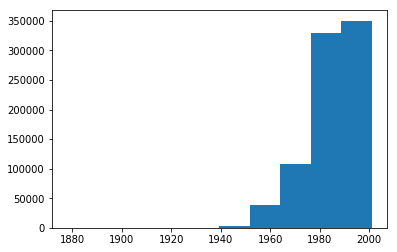

In [18]:
x_ = df_.member_birth_year.values
plt.hist(x = x_);

In [19]:
#Let's see how much data there is before 1940
data_left = (df_.member_birth_year<1940).sum()
data_left

900

In [20]:
(data_left)/df_.shape[0]*100

0.10843412687033809

We see that is around 0.1% of the total data.

So, for now let's focus on the right part of the data 

In [21]:
def gr(k,w):
    bins = np.arange(1940,df_.member_birth_year.max()+k,k)
    birth_new = df_[df_.member_birth_year>=1940].member_birth_year.values
    plt.hist(x = birth_new,bins = bins);
    x_ticks = np.arange(1940,df_.member_birth_year.max()+w,w)
    plt.xticks(x_ticks, x_ticks, rotation='vertical')

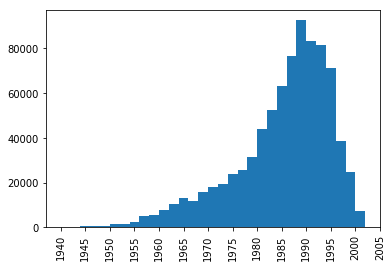

In [22]:
gr(2,5)

I created the function gr in order to change the bins size, since it could generate certain bias using a big (or a small k). I intended to use it to find a fair enough k, but it seems that this is ok. We see that the graph is left skewed. Even though this is the case, I will try with k = 1.

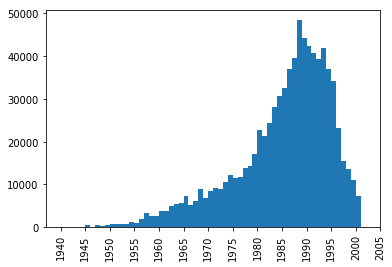

In [23]:
gr(1,5)

We see that with k = 1 I included a misinterpreation, and now it looks less left skewed, so let's maintain the previous graph for the sake of the observation.

### Observations:
- The graph of member_birth_year is left skewed with maximum around 1987
- More than 99% of the data was born after 1940

Let's continue with our exploratory analysis:
- Now, let's focus on what is the relationship between the start and endpoint

In [24]:
df_.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974,Male,No
5,6733,2019-01-31 22:35:50.8130,2019-02-01 00:28:04.5120,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,3532,Subscriber,1994,Male,No


In [25]:
start_lati = df_.start_station_latitude.values
start_long = df_.start_station_longitude.values

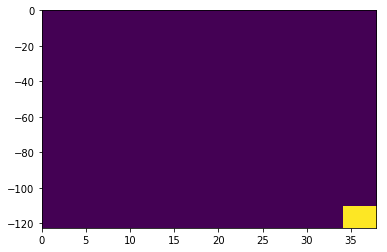

In [26]:
plt.hist2d(x = start_lati, y = start_long);

In [27]:
#This graph looks extremely weird, so let's see the data:
df_.describe()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,829277.000000,829997.000000,829997.000000,829277.000000,829997.000000,829997.000000,829997.000000
mean,139.408896,37.771020,-122.353518,137.739621,37.770396,-122.350615,1984.731395
std,113.541255,0.107404,0.177889,113.392885,0.201843,0.581523,10.060782
min,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,1878.000000
25%,46.000000,37.770407,-122.413004,44.000000,37.770407,-122.411738,1980.000000
50%,104.000000,37.780955,-122.398436,101.000000,37.781010,-122.398279,1987.000000
75%,239.000000,37.797280,-122.289415,236.000000,37.797320,-122.290230,1992.000000
max,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,2001.000000


In [28]:
#Let's check the extreme case where start_station_latitude== 0.0
df_[df_.start_station_latitude==0.0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
40680,175,2019-04-24 16:56:54.5160,2019-04-24 16:59:50.4290,420.0,SF Test Station,0.0,0.0,81.0,Berry St at 4th St,37.77588,-122.39317,1161,Subscriber,1983,Male,No


In [29]:
df_[df_.start_station_longitude==0.0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
40680,175,2019-04-24 16:56:54.5160,2019-04-24 16:59:50.4290,420.0,SF Test Station,0.0,0.0,81.0,Berry St at 4th St,37.77588,-122.39317,1161,Subscriber,1983,Male,No


This is most likely missing data. So let's remove it

In [30]:
df_ = df_[df_.start_station_longitude!=0.0]

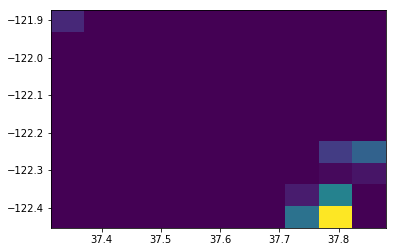

In [31]:
start_lati = df_.start_station_latitude.values
start_long = df_.start_station_longitude.values
plt.hist2d(x = start_lati, y = start_long);

This looks way more feasible, even though that is the case, let's explore this data to see if we can get any better

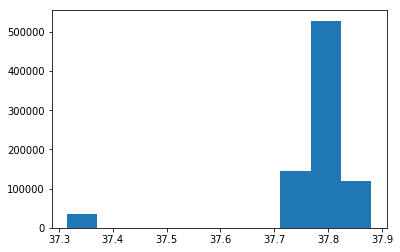

In [32]:
plt.hist(df_.start_station_latitude.values);

In [33]:
(df_.start_station_latitude.values<37.7).sum()/df_.shape[0]

0.044776119402985072

So that data is less than 5% of the total data. With this in mind, let's focus on the right part of the graph

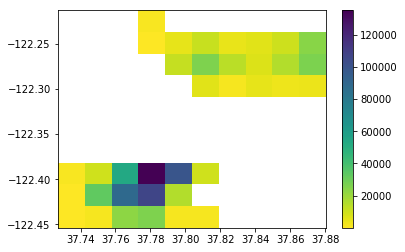

In [34]:
df_left = df_[df_.start_station_latitude>=37.7]
lat = df_left.start_station_latitude.values
long = df_left.start_station_longitude.values
plt.hist2d(x=lat,y = long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

Now let's compare this graph with its respective end

In [35]:
df_left.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,1989,Male,No


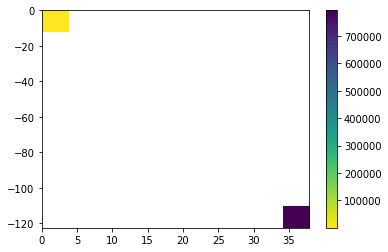

In [36]:
end_lat = df_left.end_station_latitude
end_long = df_left.end_station_longitude

plt.hist2d(x=end_lat,y = end_long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

We see than once more there is at least one point that is extreme, let's analyze it

In [37]:
df_left_aux = df_left[df_left.end_station_latitude==0]
df_left_aux

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1177,2365,2019-04-30 18:21:42.6100,2019-04-30 19:01:08.1460,50.0,2nd St at Townsend St,37.780526,-122.390288,420.0,SF Test Station,0.0,0.0,1612,Subscriber,1995,Female,No
1943,1964,2019-04-30 17:31:19.6460,2019-04-30 18:04:04.5180,98.0,Valencia St at 16th St,37.765052,-122.421866,420.0,SF Test Station,0.0,0.0,3507,Subscriber,1981,Female,No
2097,546,2019-04-30 17:45:38.4520,2019-04-30 17:54:45.2580,370.0,Jones St at Post St,37.787327,-122.413278,420.0,SF Test Station,0.0,0.0,1142,Subscriber,1991,Female,Yes
2176,630,2019-04-30 17:39:33.5070,2019-04-30 17:50:04.3140,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420.0,SF Test Station,0.0,0.0,3500,Subscriber,1991,Male,No
2629,433,2019-04-30 17:17:10.4860,2019-04-30 17:24:23.9190,11.0,Davis St at Jackson St,37.797280,-122.398436,420.0,SF Test Station,0.0,0.0,1181,Subscriber,1995,Male,No
2712,1233,2019-04-30 16:58:41.2090,2019-04-30 17:19:14.6890,81.0,Berry St at 4th St,37.775880,-122.393170,420.0,SF Test Station,0.0,0.0,2535,Subscriber,1970,Male,No
2744,1306,2019-04-30 16:55:35.9240,2019-04-30 17:17:22.1620,80.0,Townsend St at 5th St,37.775235,-122.397437,420.0,SF Test Station,0.0,0.0,462,Subscriber,1992,Male,No
3035,764,2019-04-30 16:44:12.3510,2019-04-30 16:56:56.5390,16.0,Steuart St at Market St,37.794130,-122.394430,420.0,SF Test Station,0.0,0.0,1880,Customer,1976,Male,No
15286,1491,2019-04-28 18:40:41.2880,2019-04-28 19:05:33.0630,377.0,Fell St at Stanyan St,37.771917,-122.453704,420.0,SF Test Station,0.0,0.0,150,Customer,1981,Male,No
15339,680,2019-04-28 18:40:08.3240,2019-04-28 18:51:28.3570,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420.0,SF Test Station,0.0,0.0,311,Subscriber,1981,Female,No


We see that, as the last case, there is no much data, so let's work with the complement of df_left_aux instead.

In [38]:
df_left_auxc = df_left[df_left.end_station_latitude!=0]

In [39]:
df_left_auxc.describe()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,792814.000000,792814.000000,792814.000000,792814.000000,792814.000000,792814.000000,792814.000000
mean,132.038217,37.791451,-122.375333,130.259312,37.791604,-122.374923,1984.508749
std,110.317874,0.031464,0.061251,110.021813,0.031157,0.060593,10.040472
min,3.000000,37.726943,-122.453704,3.000000,37.317298,-122.453704,1878.000000
25%,43.000000,37.771917,-122.413579,42.000000,37.772000,-122.412408,1980.000000
50%,96.000000,37.781650,-122.399018,93.000000,37.783172,-122.398870,1987.000000
75%,203.000000,37.798572,-122.390288,200.000000,37.798572,-122.390288,1992.000000
max,412.000000,37.880222,-122.213037,412.000000,37.880222,-121.883215,2001.000000


This looks like a better exploration but there is (still) a big gap between the min latitude and longitude compared to the rest of the data. Let's explore that more:

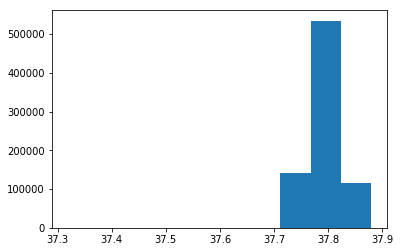

In [40]:
plt.hist(df_left_auxc.end_station_latitude.values);

Let's see how much data we lose if we focus from 37.7

In [41]:
(df_left_auxc.end_station_latitude.values<37.7).sum()/df_left_auxc.shape[0]

2.5226597915778479e-06

There is almost no data, so let's focus on the right part.

In [42]:
df_aux = df_left_auxc[df_left_auxc.end_station_latitude.values>=37.7]

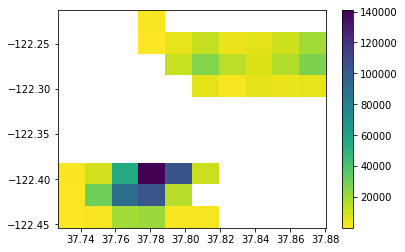

In [43]:
end_lat = df_aux.end_station_latitude
end_long = df_aux.end_station_longitude

plt.hist2d(x=end_lat,y = end_long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

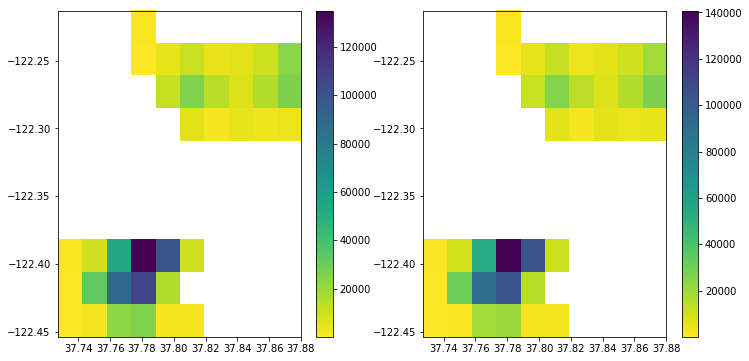

In [44]:
plt.figure(figsize= [12,6])


plt.subplot(1,2,1)

lat = df_aux.start_station_latitude.values
long = df_aux.start_station_longitude.values

plt.hist2d(x=lat,y = long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

plt.subplot(1,2,2)

end_lat = df_aux.end_station_latitude
end_long = df_aux.end_station_longitude

plt.hist2d(x=end_lat,y = end_long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();

### Observation:
- We see that the graphs are almost identical, which indicates that the start points are as common as the end points in terms of location.


# Conclusions:

- More than 99% of the data was born after 1940

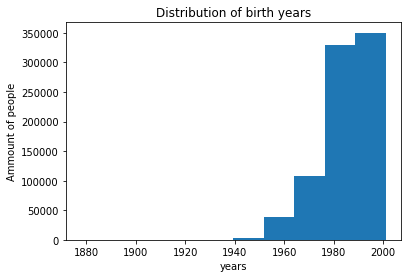

In [45]:
x_ = df_.member_birth_year.values
plt.hist(x = x_);
plt.title('Distribution of birth years')
plt.xlabel('years')
plt.ylabel('Ammount of people');

In [46]:
data_left = (df_.member_birth_year<1940).sum()
data_left/df_.shape[0]*100

0.10843425751449404

- The graph of member_birth_year is left skewed with maximum around 1987

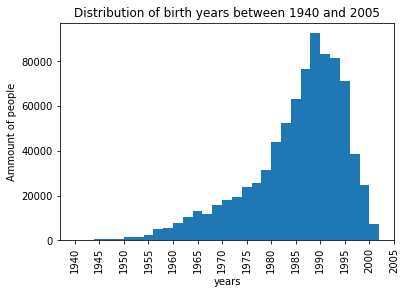

In [47]:
gr(2,5)
plt.title('Distribution of birth years between 1940 and 2005')
plt.xlabel('years')
plt.ylabel('Ammount of people');

- The end and start point of the service are almost identical.

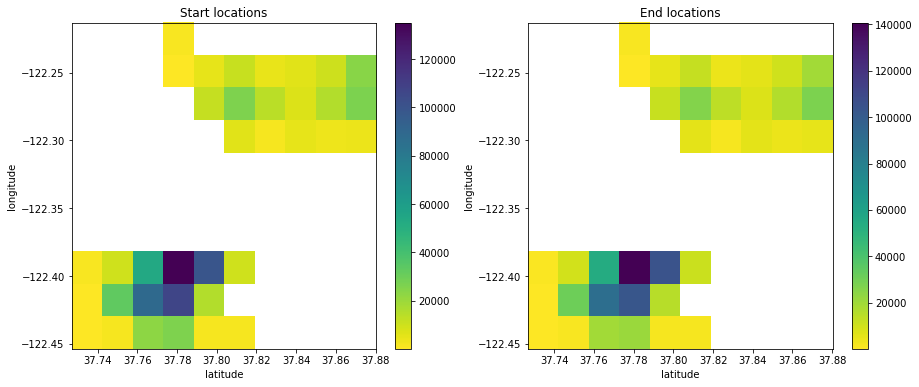

In [51]:
plt.figure(figsize= [15,6])


plt.subplot(1,2,1)

lat = df_aux.start_station_latitude.values
long = df_aux.start_station_longitude.values

plt.hist2d(x=lat,y = long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();
plt.title('Start locations')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.subplot(1,2,2)

plt.title('End locations')
plt.xlabel('latitude')
plt.ylabel('longitude')

end_lat = df_aux.end_station_latitude
end_long = df_aux.end_station_longitude

plt.hist2d(x=end_lat,y = end_long, cmap = 'viridis_r', cmin = 0.5);
plt.colorbar();